In [2]:
import pandas as pd

# Path to the CSV file in your Google Drive
file_path = "/content/drive/MyDrive/netflix_titles.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Preview the first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Check for missing values in each column
print("Missing values per column:")
print(df.isnull().sum())

print("\nDataset info:")
print(df.info())


Missing values per column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   objec

In [4]:
# Fill missing text columns with 'Unknown'
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Unknown")

# Fill missing duration
df['duration'] = df['duration'].fillna("Not Available")

# Convert date_added to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Fill missing date_added with a placeholder date
df['date_added'] = df['date_added'].fillna(pd.Timestamp("1900-01-01"))

print("Data cleaning done")


 Data cleaning done


/tmp/ipython-input-4165059056.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='viridis')


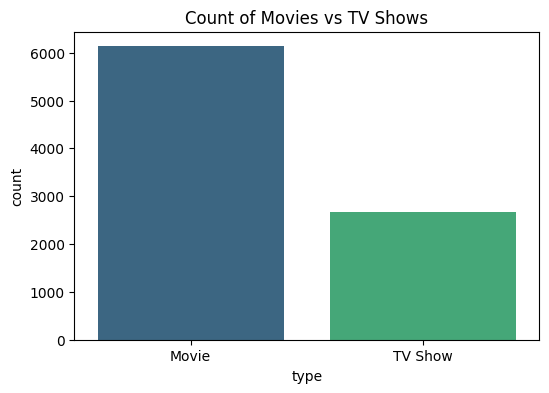

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset load (agar already df variable me loaded hai to ye line skip karo)
# df = pd.read_csv("/content/drive/MyDrive/netflix_titles.csv")

# 1. Content type count (Movies vs TV Shows)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='viridis')
plt.title("Count of Movies vs TV Shows")
plt.show()

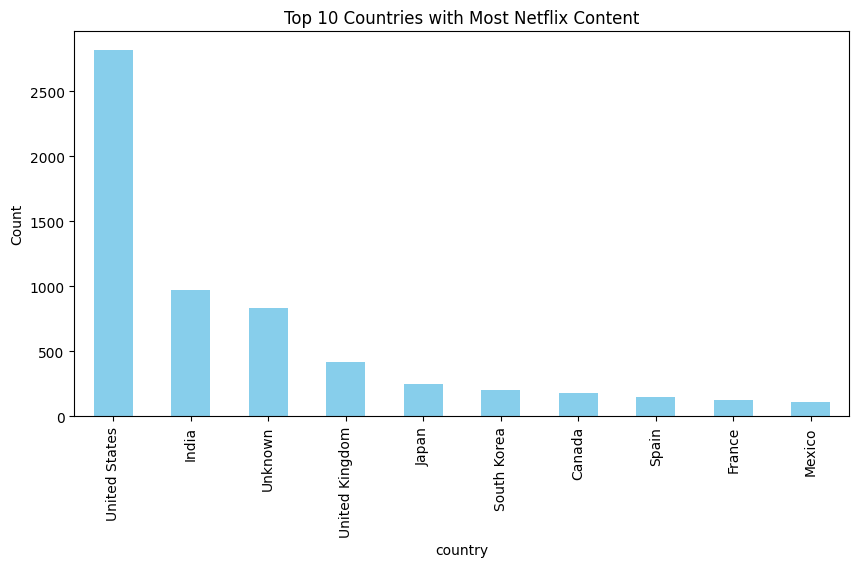

In [6]:
# 2. Top 10 countries with most content
plt.figure(figsize=(10,5))
df['country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries with Most Netflix Content")
plt.ylabel("Count")
plt.show()


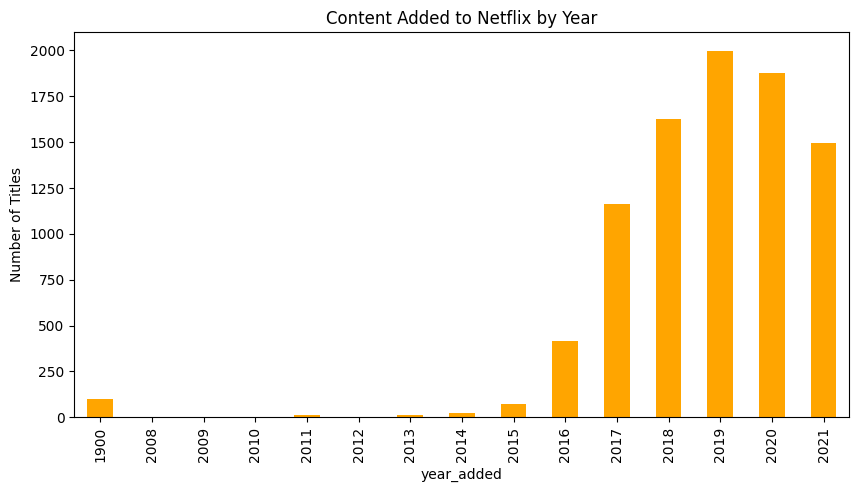

In [7]:
# 3. Content added by year
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
plt.figure(figsize=(10,5))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title("Content Added to Netflix by Year")
plt.ylabel("Number of Titles")
plt.show()


/tmp/ipython-input-2663775940.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='coolwarm')


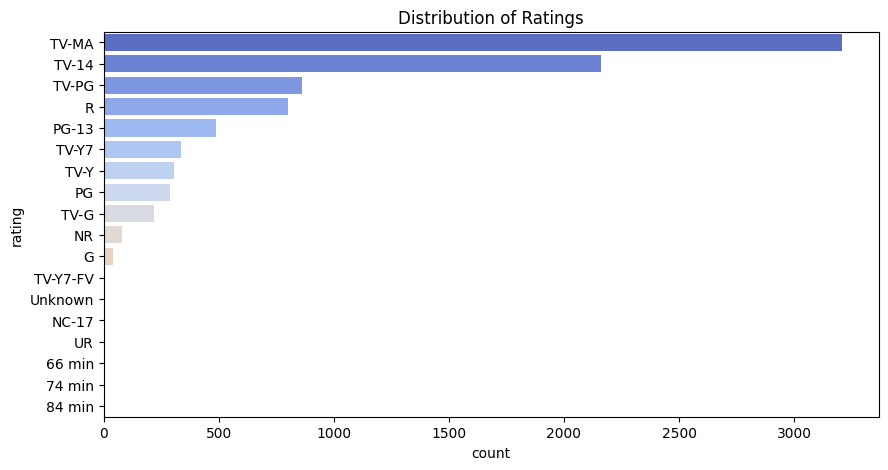

In [8]:
# 4. Distribution of Ratings
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='coolwarm')
plt.title("Distribution of Ratings")
plt.show()

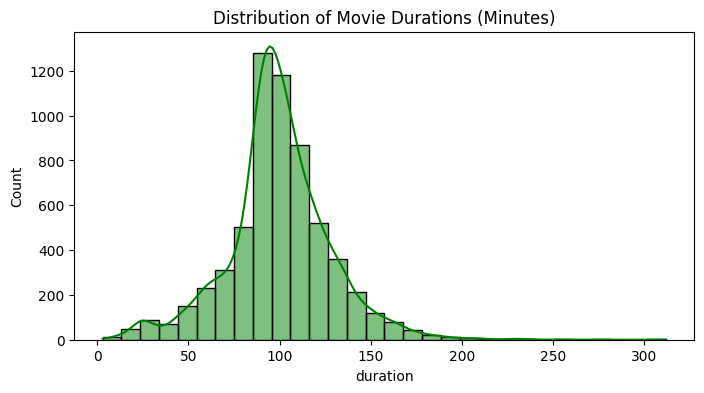

In [10]:
# 5. Movie duration distribution
movie_durations = df[df['type']=='Movie']['duration']
movie_durations = movie_durations[movie_durations != 'Not Available'].str.replace(" min","").astype(float)
plt.figure(figsize=(8,4))
sns.histplot(movie_durations, bins=30, kde=True, color='green')
plt.title("Distribution of Movie Durations (Minutes)")
plt.show()

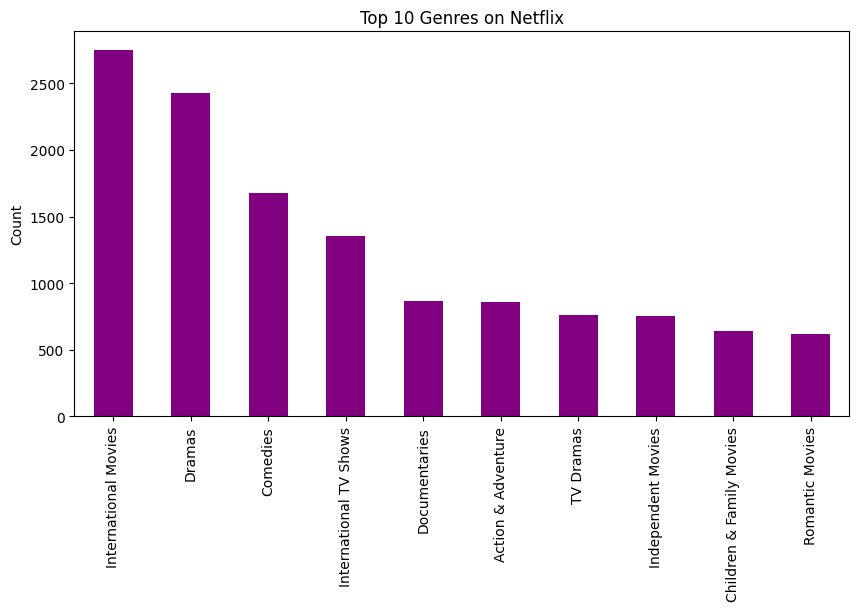

In [11]:
from collections import Counter
genre_list = []
for listed in df['listed_in'].dropna():
    for genre in listed.split(','):
        genre_list.append(genre.strip())
genre_counts = Counter(genre_list)
plt.figure(figsize=(10,5))
pd.Series(genre_counts).sort_values(ascending=False).head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Genres on Netflix")
plt.ylabel("Count")
plt.show()

In [12]:
# Automatic Insights from Netflix Data

print(" Netflix Dataset Insights\n")

# 1. Total Titles
total_titles = df.shape[0]
print(f"Total titles on Netflix: {total_titles}")

# 2. Movies vs TV Shows count
movies_count = df[df['type'] == 'Movie'].shape[0]
tvshows_count = df[df['type'] == 'TV Show'].shape[0]
print(f"Movies: {movies_count} ({movies_count/total_titles*100:.2f}%)")
print(f"TV Shows: {tvshows_count} ({tvshows_count/total_titles*100:.2f}%)")

# 3. Country with most content
top_country = df['country'].value_counts().idxmax()
print(f"Country with most content: {top_country}")

# 4. Most common rating
common_rating = df['rating'].value_counts().idxmax()
print(f"Most common rating: {common_rating}")

# 5. Year with highest content addition
year_highest = df['year_added'].value_counts().idxmax()
print(f"Year with highest content addition: {year_highest}")

# 6. Most common genre
from collections import Counter
genre_list = []
for listed in df['listed_in'].dropna():
    for genre in listed.split(','):
        genre_list.append(genre.strip())
most_common_genre = Counter(genre_list).most_common(1)[0][0]
print(f"Most common genre: {most_common_genre}")


Netflix Dataset Insights

Total titles on Netflix: 8807
Movies: 6131 (69.62%)
TV Shows: 2676 (30.38%)
Country with most content: United States
Most common rating: TV-MA
Year with highest content addition: 2019
Most common genre: International Movies


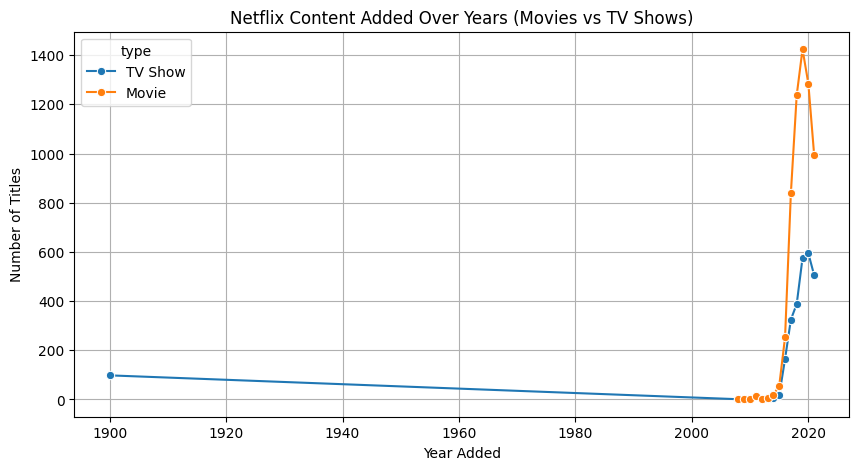

/tmp/ipython-input-572341566.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


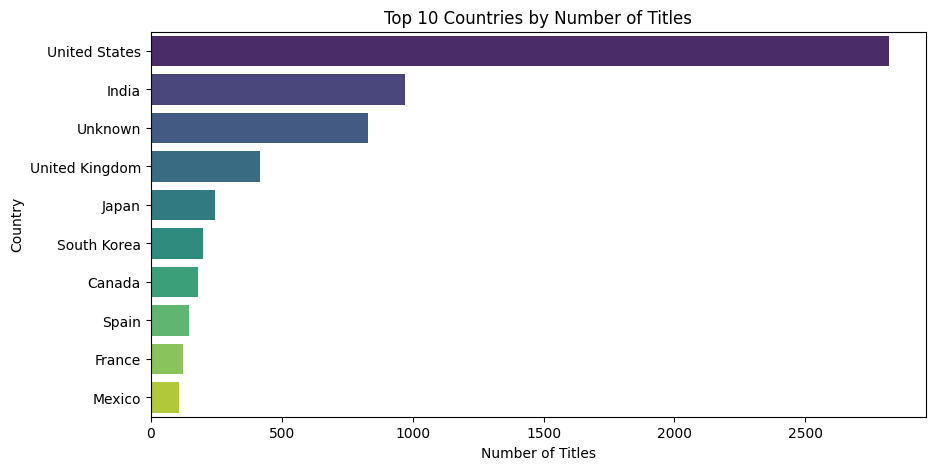

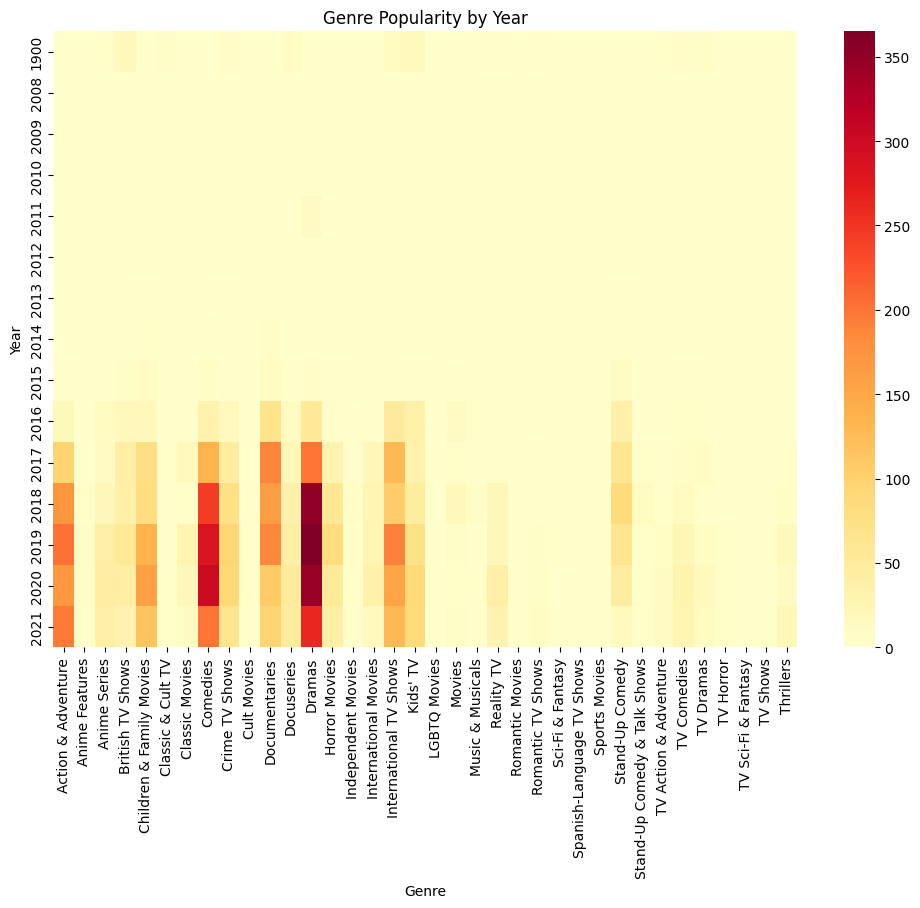

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trend Analysis
trend_df = df.groupby(['year_added', 'type']).size().reset_index(name='count')
plt.figure(figsize=(10,5))
sns.lineplot(data=trend_df, x='year_added', y='count', hue='type', marker='o')
plt.title('Netflix Content Added Over Years (Movies vs TV Shows)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

# Top 10 Countries
plt.figure(figsize=(10,5))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

# Genre Popularity Heatmap
genre_year = df.copy()
genre_year['main_genre'] = genre_year['listed_in'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else None)
genre_heatmap = genre_year.groupby(['year_added', 'main_genre']).size().unstack(fill_value=0)

plt.figure(figsize=(12,8))
sns.heatmap(genre_heatmap, cmap='YlOrRd')
plt.title('Genre Popularity by Year')
plt.xlabel('Genre')
plt.ylabel('Year')
plt.show()


In [14]:
# Summary / Insights (Ready for Resume & Report)
summary_text = """
Netflix Dataset Analysis – Key Insights

1. Netflix ke paas total 8,807 titles hain, jisme:
   • 6,131 Movies (69.6%)
   • 2,676 TV Shows (30.4%)

2. Content ka sabse bada producer – United States.
3. Sabse common rating – TV-MA (Mature Audience).
4. Sabse zyada content 2019 me add hua.
5. International Movies genre sabse zyada popular hai.
6. Trend analysis dikhata hai ki 2015 ke baad se TV Shows ka growth accelerate hua hai.
7. Country-wise data batata hai ki India aur UK top contributors me hain.
8. Genre heatmap se pata chalta hai ki 2018 ke baad Action, Dramas aur Documentaries ka craze badha.

Recommendations:
- Netflix ko non-US countries me aur local content banane pe focus karna chahiye.
- TV Shows ke growth ko dekhte hue, long-format series production badhaya jaa sakta hai.
- Documentaries aur Action movies pe zyada investment return de sakta hai 2018 ke baad ke trends ke hisaab se.
"""

print(summary_text)



Netflix Dataset Analysis – Key Insights

1. Netflix ke paas total 8,807 titles hain, jisme:
   • 6,131 Movies (69.6%)
   • 2,676 TV Shows (30.4%)

2. Content ka sabse bada producer – United States.
3. Sabse common rating – TV-MA (Mature Audience).
4. Sabse zyada content 2019 me add hua.
5. International Movies genre sabse zyada popular hai.
6. Trend analysis dikhata hai ki 2015 ke baad se TV Shows ka growth accelerate hua hai.
7. Country-wise data batata hai ki India aur UK top contributors me hain.
8. Genre heatmap se pata chalta hai ki 2018 ke baad Action, Dramas aur Documentaries ka craze badha.

Recommendations:
- Netflix ko non-US countries me aur local content banane pe focus karna chahiye.
- TV Shows ke growth ko dekhte hue, long-format series production badhaya jaa sakta hai.
- Documentaries aur Action movies pe zyada investment return de sakta hai 2018 ke baad ke trends ke hisaab se.



In [16]:
%pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.3 MB/s eta 0:00:00


In [17]:
%pip install reportlab

In [18]:
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import A4
from reportlab.lib.units import inch

# PDF file ka naam
pdf_file = "Netflix_EDA_Report.pdf"

# Styles load karo
styles = getSampleStyleSheet()
title_style = styles['Title']
normal_style = styles['Normal']
heading_style = styles['Heading2']

# PDF document create karo
doc = SimpleDocTemplate(pdf_file, pagesize=A4)
elements = []

# Title
elements.append(Paragraph("📊 Netflix Data Analysis Report", title_style))
elements.append(Spacer(1, 0.2 * inch))

# Dataset details
dataset_info = """
<b>Dataset Details:</b><br/>
• Total titles: 8,807<br/>
• Movies: 6,131 (69.62%)<br/>
• TV Shows: 2,676 (30.38%)<br/>
• Country with most content: United States<br/>
• Most common rating: TV-MA<br/>
• Year with highest content addition: 2019<br/>
• Most common genre: International Movies
"""
elements.append(Paragraph(dataset_info, normal_style))
elements.append(Spacer(1, 0.2 * inch))

# Methodology
methodology = """
<b>Methodology:</b><br/>
1. Data Cleaning (Missing values handled, date formatting)<br/>
2. Exploratory Data Analysis (EDA) with Pandas, Matplotlib, Seaborn<br/>
3. Insights extraction from trends and patterns
"""
elements.append(Paragraph(methodology, normal_style))
elements.append(Spacer(1, 0.2 * inch))

# Conclusions
conclusion = """
<b>Key Insights & Recommendations:</b><br/>
• Netflix content is dominated by Movies but TV Shows are growing rapidly.<br/>
• United States has the largest content share but other countries are rising.<br/>
• Ratings like TV-MA are most common, suggesting mature audience targeting.<br/>
• Content production peaked in 2019 but dropped post-pandemic.
"""
elements.append(Paragraph(conclusion, normal_style))

# Save PDF
doc.build(elements)

print(f"PDF Report generated: {pdf_file}")


PDF Report generated: Netflix_EDA_Report.pdf
